# Word Embeddings

### Motivation

* Bisher haben wir ausschließlich Verfahren kennen gelernt, die auf statistischen Worthäufigkeiten basieren.
* Diese Verfahren können keine- oder kaum Semantik in den Textdaten abbilden.
* Word Embeddings (Worteinbettungen) können die Semantik von Tokens abbilden.

#### Idee

* Jedes Token wird auf einen gleichlangen n-dimensionalen Vektor abgebildet.
* Ähnliche Tokens liegen dabei in diesem Raum nahe zusammen.
  * Sie haben also eine hohe Ähnlichkeit.

* Durchbruch in der maschinellen Sprachverarbeitung.
* Schlüsselerfolg des Deep Learnings.
* Grundstein etwickelt von Mikolov et al. (Google Research, 2013). [Link zum Paper](https://arxiv.org/pdf/1301.3781.pdf)

## Einordnung in die Pipeline

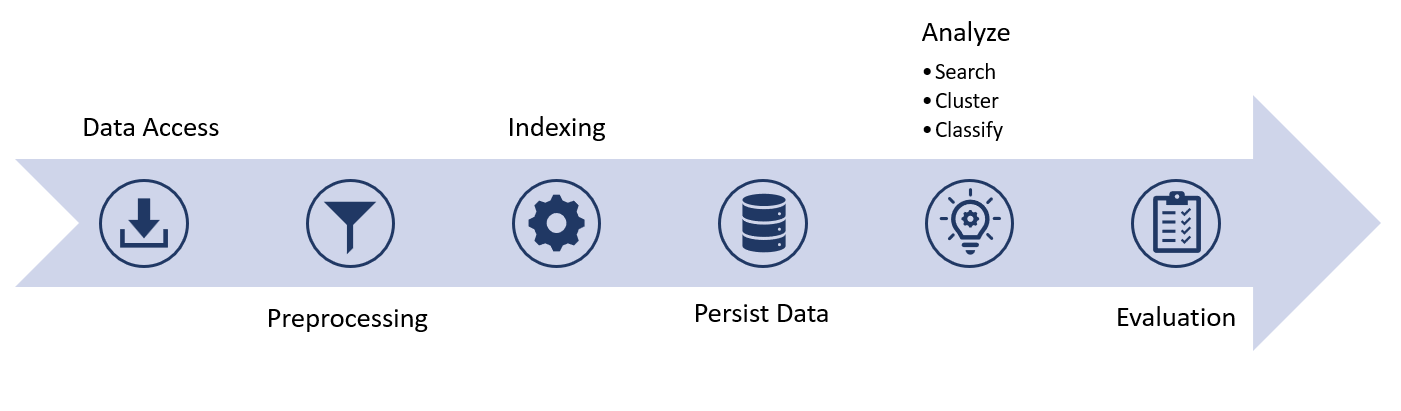

## Inhalt

* Funktionsprinzip
* Praxis 

# Funktionsprinzip

## Was ist Deep Learning?

* Word Embeddings werden mit tiefen künstlichen neuronalen Netzen trainiert.
* Deep Learning ist mittlerweile zu einem Buzz Word geworden.

* Tiefe neuronale Netze sind eine Erweiterung herkömmlicher neuronale Netze.
  * Die Netze besitzen eine "tiefe", umfangreiche Struktur.
  * Durch angepasste Strukturen ist es im Deep Learning möglich, die Extraktion von Merkmalen aus den Daten **zu erlernen**.
  * Beispiel Bilderkennung: Das Netz lernt selbstständig zunächst die Kanten eines Objekts zu erkennen. Anschließend werden dadurch Formen erkannt bishin zum eigentlichen Objekt (Convolutional Neuronal Networks, CNNs):
  * Dies wird durch die Verkettung vieler einzelner Schichten (Layers) umgesetzt. Deshalb wird das Netz immer "tiefer".

### Deep Learning Anwendungen

* Bild:
  * Bilderkennung: Convolutional Neuronal Networks, CNNs
  * Bildgenerierung: General Adverserial Networks, GANs 
* Text:
  * GloVe, Doc2Vec, Word2Vec, SkipGrams
  * Transformer Networks
  * BERT
* Zeitabhängige Daten
  * Recurrent Neuronal Networks, RNNs
  * Long Short Term Memory-Networks, LSTMs
* Datenkompression / Anomalieerkennung
  * Autoencoder
* Graphen
  * Graph Neuronal Networks, GNNs
  * G-Flow Nets
* Reinforcement Learning
  * Deep-Q-Learning
  * Alpha Go, etc.
  
  
Und viele mehr...

#### Jedoch...

* Deep Learning Modelle sind sehr komplex.
* Das bringt eine enorme Rechenintensität mit sich.
* Und: Je komplexer ein Modell ist, desto mehr Daten werden für gute Resultate benötigt

## Wie entsteht ein Word Embedding?

* Ein tiefes neuronales Netz wird überwacht trainiert.
* Das Ziel ist die Optimierung der Vorhersage des nächsten Tokens (Y) bei einer gegebenen Sequenz von Wörtern (X) (CBOW Methode).
* Dadurch wird also gelernt, in welchem _Kontext_ das Token vorkommt.

Beispiel:
* Satz 1: Ich fahre gerne Auto.
* Satz 2: Ich fahre gerne Motorrad.



* Das Netz sieht also, dass die Tokens Auto und Motorrad im selben Kontext vorkommen.
* Das Netz muss also lernen vorherzusagen, wie es nach _Ich fahre gerne_ üblicherweise weitergeht.
* Da es gesehen hat, dass darauf entweder Auto oder Motorrad folgt, liegt die Entscheidung des Netzes wohl nah beieinander, ergo generiert es für beide Tokens sehr ähnliche Vektoren.

## Online Demo

* [Englisches Word Embedding, Herausgeber NLPL.eu](http://vectors.nlpl.eu/explore/embeddings/en/#)
* Wird z.B. das Token _car_ eingegeben, werden semantisch ähnliche Tokens angezeigt wie:
  * minivan, vehicle or motor cycle etc.
* Semantische Ähnlichkeiten können im n-dimensionalen Raum durch bereits bekannte Metriken wie der Euklidischen Distanz oder der Cosinus Ähnlichkeit berechnet werden.

# Word Embeddings in der Praxis

* Für die Praxis nutzen wir ein bereits fertiges Word Embedding von [fasttext](https://fasttext.cc/). 
  * Fasttext wurde von Facebook Research entwickelt.
  * Für bessere Laufzeit in C++ programmiert, es gibt jedoch eine Python-API.
* Es wird das Embedding in deutscher Sprache genutzt
  * Die Datei ist entpackt ca. 7 GB groß!

In [1]:
import fasttext.util
import fasttext
import numpy as np

In [ ]:
# download word embedding using fasttext
fasttext.util.download('cc.de.300.bin')

In [2]:
# Hinweis: hier müssen Sie den Pfad eingeben, wo das Embedding bei Ihnen gespeichert ist.
embedding_model = fasttext.load_model(r'..\..\data\embedding\cc.de.300.bin')

In [3]:
# Dimensionen der Word Vektoren
embedding_model.get_dimension()

300

In [4]:
# Anzahl der enthaltenen Wörter im Embedding
len(embedding_model.get_words())

2000000

In [5]:
# Ausgabe der ersten Stellen eines Wort Vektors
embedding_model.get_word_vector("Auto")[:30]

array([ 0.11197257, -0.1045592 ,  0.0390188 ,  0.02129861, -0.05741454,
       -0.07643013, -0.09186946, -0.05385276, -0.06809476, -0.01455527,
        0.08936103, -0.04859175,  0.05777086,  0.04201668, -0.01125758,
        0.01351735,  0.11042433, -0.0318602 ,  0.04995156, -0.09024277,
        0.05353189, -0.03861123,  0.12335708, -0.12703638,  0.02213011,
       -0.00684068,  0.05967082,  0.00916249, -0.06636237, -0.10171493],
      dtype=float32)

In [22]:
# Großschreibung ist wichtig!
embedding_model.get_word_vector("auto")[:30]

array([ 0.01679997, -0.0929721 ,  0.02750075, -0.04079474, -0.02932296,
       -0.06598095, -0.07098331, -0.06013108, -0.08597714, -0.03298213,
        0.08300769, -0.10609016,  0.08635578,  0.06572014,  0.00804729,
        0.07538508,  0.03801207,  0.02771989,  0.10806386,  0.02019051,
       -0.04036462, -0.03777646,  0.18327294, -0.00711816,  0.07809934,
        0.01492953,  0.00141098,  0.00835299, -0.08730396, -0.14941497],
      dtype=float32)

### Was können wir nun damit anstellen?

* Die Suche nach semantisch ähnlichen Wörtern
* "Rechnen" mit Wörtern: _Mann_ verhält sich zu _König_ wie _Frau_ zu?

In [6]:
# Finden der semantisch ähnlichsten Wörter
# nicht wundern, das kann rechenintensiv sein
embedding_model.get_nearest_neighbors("Auto")

[(0.7243714332580566, 'Fahrzeug'),
 (0.6894841194152832, 'Motorrad'),
 (0.6690414547920227, 'PKW'),
 (0.6683183908462524, 'Fahrrad'),
 (0.6650068759918213, 'Leihauto'),
 (0.6477326154708862, 'Autos'),
 (0.6430654525756836, 'auto'),
 (0.6359797120094299, 'Auto.Das'),
 (0.6321404576301575, 'Auto.'),
 (0.6292569637298584, 'Sommerauto')]

#### Nicht schlecht oder?

* Die Methode ``get_nearest_neighbors`` berechnet die Cosinus Ähnlichkeit des Word Vektors von Auto zu allen anderen und gibt die besten Resultate aus.

In [7]:
# Dies gibt das selbe Ergebnis wie get_neighbors von fasttext.
from scipy.spatial.distance import cosine

auto = embedding_model.get_word_vector("Auto")
fahrzeug = embedding_model.get_word_vector("Fahrzeug")
1 - cosine(auto, fahrzeug)

0.7243713140487671

### Mit Wörtern "rechnen"

Annahme: Die (semantische) Entfernung im n-dimensionalen Raum zwischen den Wörtern König und Mann ist gleich wie zwischen  Königin und Frau.

$$ könig + mann = frau + königin $$
$$ königin = könig + mann - frau$$

In [135]:
embedding_model.get_analogies("König", "Mann", "Frau")

[(0.6669625639915466, 'Königin'),
 (0.6069499254226685, 'Königs'),
 (0.5830625891685486, 'Elisabeth'),
 (0.5826849937438965, 'Prinzessin'),
 (0.5708263516426086, 'Beatrix'),
 (0.5664327144622803, 'Katharina'),
 (0.5610042810440063, 'Margarete'),
 (0.5575653910636902, 'Ludwig'),
 (0.5511189103126526, 'Heinrich'),
 (0.5484403967857361, 'Kaiserin')]

In [8]:
# dies ist kein Zufall, daher weitere Beispiele:
embedding_model.get_analogies("Berlin", "Deutschland", "Frankreich", k=2)

[(0.7423688173294067, 'Paris'), (0.6406381726264954, 'Marseille')]

In [9]:
embedding_model.get_analogies("Bruder", "Junge", "Mädchen", k=2)

[(0.6884191632270813, 'Schwester'), (0.6690407991409302, 'Neffen')]

In [10]:
# Was ist die Vorwahl von Berlin?
embedding_model.get_analogies("0711", "Stuttgart", "Berlin", k=2)

[(0.6958325505256653, '030'), (0.6061018109321594, '0331')]

## Was ist mit unbekannten Wörtern?

* in den 2 Millionen enthaltenen Wörtern ist es unmöglich, dass alle Wörter drt vorkommen.
* Besonders betroffen sind dabei Eigennamen oder geographische Bezeichnungen.
* fastTest schafft einen Workaround: wird ein unbekanntes Token eingegeben, ist sein Vektor die Summe seiner bekannten Substrings.
* Da nahezu jedes Zeichen als extra Token vorkommt (z.B. a, b usw.) kann also jedes Wort "gebaut" werden.
* Dies ist zwar ein Workaround, jedes ist die Semantik in dieser Hinsicht verloren...

### Doc2Vec

* fastText kann auch ein ganzes Dokument in einen Dokumenten Vektor umwandeln
* diese Methode kann nun als _Indexierung_ für weitere Analysen wie Clustering etc. genutzt werden.

In [79]:
# Ausgabe der ersten 30 Dimensionen
embedding_model.get_sentence_vector("hallo, das ist ein Dokument.")[:30]

array([-0.00311523,  0.03328734,  0.04294303,  0.03904391, -0.03491808,
       -0.06834549, -0.01074354,  0.00136908, -0.02156482,  0.03909404,
        0.04457886, -0.00561541, -0.06151803, -0.00436759, -0.00472405,
       -0.04286407,  0.1002242 ,  0.01770441,  0.01327251, -0.04970026,
        0.00520255, -0.02213651, -0.00258427,  0.02465544,  0.00037932,
        0.01180297, -0.03556162,  0.00751692,  0.00348983, -0.01959581],
      dtype=float32)

* Die Tokenization wird hier von fastText übernommen (es wird hauptsächlich an Leerzeichen gesplittet)
* Wollen Sie die TOkenization selbst machen, müssen Sie den Dokumentvektor selbst berechnen. Dies geschiet über:

$$ docvec = \sum^t_{i=0}{\,wordvec\,(t_i)} $$

* Also die Summe aller seiner $wordvec$ der Tokens $t$ ergibt den Dokumentvektor $docvec$

# Fazit

* Word Embeddings sind/waren eine Revolution in der maschinellen Sprachverarbeitung.
* Seitdem haben Sie sich in diesem Bereich als Standard etabliert.
* Durch Erlernen der Vorhersage eines Wortes aus dem Kontext, gelingt es dem Modell Wörter auf Vektoren abzubilden, die ihre Semantik widerspiegeln.
* Viele weitere Sprachmodelle wurden darauf basierend entwickelt z.B. Transformer, BERT, etc.
* Jedoch: Muss auf einmalig riesigen Datenmengen _lange_ trainiert werden!